In [1]:
from model import FFNet, tv_model
from learning import Learn, Selector
from dataset import SKDS, TVDS, CDataset

from torch.optim import Adam
from torch.nn import MSELoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


In [ ]:
import numpy as np

class Dummy(CDataset):
    
    def load_data(self, boom='bust'):
        data = {1: (np.asarray(10), np.asarray(100), ['apples','dogs']),
                2: (np.asarray(20), np.asarray(200), ['oranges','cats'])}
        print(boom)
        return data
    
ds_params = {'embeds': [('fruits',2,8,False,False),('pets',2,8,False,False)],
             'embeds_lookup': {'fruit': {'apple': 1,
                                          'orange': 2},
                               'pet': {'dog': 1,
                                        'cat': 2}},
             'boom': 'bang'}
    
d = Dummy(**ds_params)
d[1]
               

SKDS created...
epoch: 0 of 100, train loss: 11141.53524215133, val loss: 1424.300732421875, lr: 0.01
epoch: 10 of 100, train loss: 730.050306532118, val loss: 1193.8682739257813, lr: 0.01
epoch: 20 of 100, train loss: 821.7130771213108, val loss: 989.6058227539063, lr: 0.0025
epoch: 30 of 100, train loss: 550.1616663049768, val loss: 471.5270202636719, lr: 0.00125
epoch: 40 of 100, train loss: 572.1510778356482, val loss: 446.19895629882814, lr: 0.000625
epoch: 50 of 100, train loss: 503.0620343243634, val loss: 636.5560791015625, lr: 0.0003125
epoch: 60 of 100, train loss: 517.3523390028212, val loss: 446.15562744140624, lr: 7.8125e-05
epoch: 70 of 100, train loss: 609.1479062680845, val loss: 464.63359985351565, lr: 1.953125e-05
epoch: 80 of 100, train loss: 564.47331294307, val loss: 444.14585571289064, lr: 9.765625e-06
epoch: 90 of 100, train loss: 581.927235921224, val loss: 528.5395233154297, lr: 4.8828125e-06
test loss: 627.2702433268229
y_pred:
tensor([[ -47.6430],
        [-1

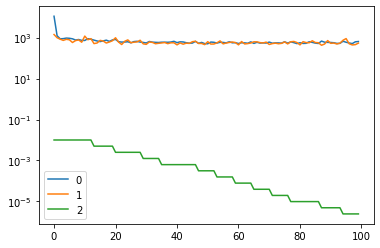

learning time: 0:00:55.085595


In [3]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'ds_params': {'embed': [],
                           'make': 'make_regression',
                           'transform': None,
                           'target_transform': None,
                           'sk_params': {'n_samples': 10000,
                                         'n_features': 128}}}
             
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 5}


l = Learn([SKDS], FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss,
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=100)

In [ ]:
model_params = {'model_name': 'resnet18',
                'in_channels': 1,
                'tv_params': {'num_classes': 10}}

ds_params={'train_params': {'embed': [],
                            'dataset': 'MNIST',
                            'tv_params': {'root': './data/',
                                          'train': True,
                                          'download': True,
                                          'transform': transforms.Compose([
                                                           transforms.Resize(224),
                                                           transforms.ToTensor()]),
                                          'target_transform': None}},
           'test_params': {'embed': [],
                           'dataset': 'MNIST',
                           'tv_params': {'root': './data/',
                                         'train': False,
                                         'download': True,
                                         'transform': transforms.Compose([
                                                         transforms.Resize(224),
                                                         transforms.ToTensor()]),
                                         'target_transform': None}}}
        
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.8,.2)}
sched_params = {'factor': .5,
                'patience': 1}

l = Learn([TVDS,TVDS], tv_model, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=CrossEntropyLoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=64, epochs=10)

In [ ]:
d[2]